In [130]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

In [131]:
usarrests = pd.read_csv('C:/Users/User/Desktop/USArrests.csv',sep=',',decimal='.',header=0, names=['Murder','Assault','UrbanPop','Rape'])

In [132]:
usarrests

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [133]:
standardized_x = preprocessing.scale(usarrests)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [134]:
standardized_x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [135]:
usarrests1 = standardized_x

In [136]:
kmean = KMeans(n_clusters=4)
kmean.fit(usarrests1)
labels = kmean.predict(usarrests1)

In [137]:
labels

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [168]:
centroids = kmean.cluster_centers_

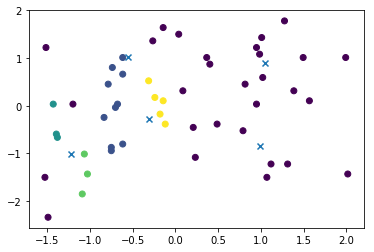

In [169]:
plt.scatter(usarrests1[:,1],usarrests1[:,2],c=labels)
plt.scatter(centroids[:,1],centroids[:,2],marker='x')
plt.show()

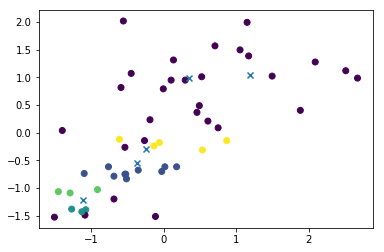

In [170]:
plt.scatter(usarrests1[:,3],usarrests1[:,1],c=labels)
plt.scatter(centroids[:,3],centroids[:,1],marker='x')
plt.show()

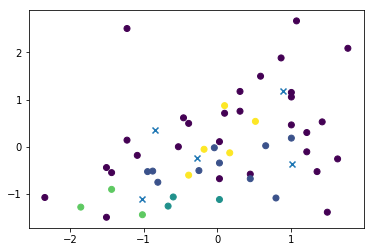

In [171]:
plt.scatter(usarrests1[:,2],usarrests1[:,3],c=labels)
plt.scatter(centroids[:,2],centroids[:,3],marker='x')
plt.show()

In [177]:
print(kmean.inertia_)

50.211423884532635


In [180]:
inertia_list = []
for k in np.arange(1, 8):
 kmean = KMeans(n_clusters=k)
 kmean.fit(usarrests1)
 inertia_list.append(kmean.inertia_)

inertia_list

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 49.94594570974446,
 43.74655557175968,
 39.56065659244463]

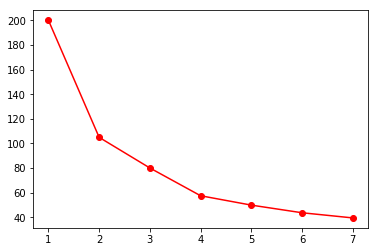

In [182]:
plt.plot( np.arange(1 , 8),  inertia_list, 'ro-')
plt.show()

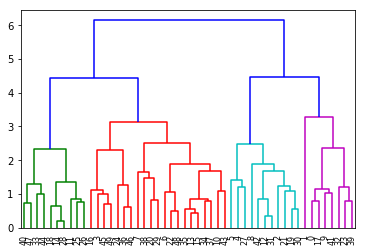

In [183]:
hierachical = linkage(usarrests1 , method ='complete')
dendrogram(hierachical)
plt.show()

In [186]:
labels = fcluster(hierachical , 4, criterion = 'distance')
labels

array([4, 4, 3, 2, 3, 3, 2, 2, 3, 4, 2, 1, 3, 2, 1, 2, 2, 4, 1, 3, 2, 3,
       2, 4, 2, 1, 1, 3, 1, 2, 3, 3, 4, 1, 2, 2, 2, 2, 2, 4, 1, 4, 3, 2,
       1, 2, 2, 1, 2, 2], dtype=int32)

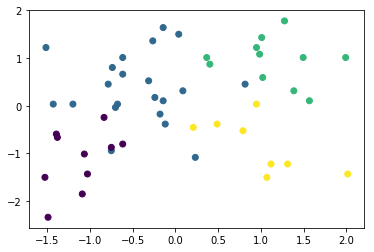

In [187]:
plt.scatter(usarrests1[:,1],usarrests1[:,2] , c = labels)
plt.show()

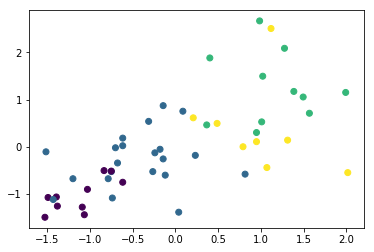

array([4, 4, 3, 2, 3, 3, 2, 2, 3, 4, 2, 1, 3, 2, 1, 2, 2, 4, 1, 3, 2, 3,
       2, 4, 2, 1, 1, 3, 1, 2, 3, 3, 4, 1, 2, 2, 2, 2, 2, 4, 1, 4, 3, 2,
       1, 2, 2, 1, 2, 2], dtype=int32)

In [192]:
labels = fcluster(hierachical ,4 ,  criterion = 'distance')
plt.scatter(usarrests1[:,1],usarrests1[:,3] , c = labels)
plt.show()
labels

In [199]:
dbscan = DBSCAN()
dbscan.fit(usarrests1)
labels = dbscan.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [201]:
dbscan = DBSCAN(eps=0.5,min_samples=1)
dbscan.fit(usarrests)
labels = dbscan.labels_
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

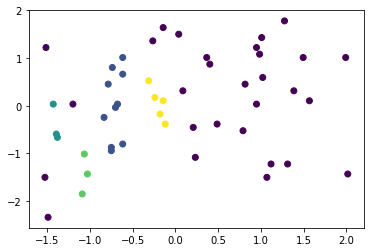

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  1,  0,  0,
       -1,  2, -1, -1, -1, -1, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1, -1,
        0,  3,  3,  0, -1, -1,  2, -1, -1,  0, -1,  3,  3,  2,  1,  3],
      dtype=int64)

In [206]:
dbscan = DBSCAN(eps=15,min_samples=3)
dbscan.fit(usarrests)
labels = dbscan.labels_
plt.scatter(usarrests1[:,1],usarrests1[:,2] , c=labels)
plt.show()
labels